In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/Real estate.csv')

# a-) print the shape and show the last 5 rows define x and y,  split them as train, validation and test data 75 15 15

In [ ]:

df.shape

(414, 8)

In [ ]:
df.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
y = df.pop('Y house price of unit area')

In [ ]:
######## 
df.drop('No', axis = 'columns', inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y, test_size = 0.30, random_state = 100)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(289, 6) (125, 6) (289,) (125,)


In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test, test_size = 0.50, random_state = 100)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape, y_val.shape)

(289, 6) (63, 6) (289,) (63,) (62, 6) (62,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 287 to 8
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     289 non-null    float64
 1   X2 house age                            289 non-null    float64
 2   X3 distance to the nearest MRT station  289 non-null    float64
 3   X4 number of convenience stores         289 non-null    int64  
 4   X5 latitude                             289 non-null    float64
 5   X6 longitude                            289 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 15.8 KB


# b-) Draw on a figure the mean squared training and validation error curves as a function
#of p for p = 1, 2, 3, 4, 5. What is the optimal value of p? Justify your reasoning.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
dgrlist = [1,2,3,4,5]
msqListTrain = []
msqListVal = []
def error(msqListVal,msqListTrain,p):
    print('degree: ', p)
    poly_reg = PolynomialFeatures(degree = p)
    X_poly = poly_reg.fit_transform(x_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(X_poly)
    print('mean squared error of training: %.2f' % mean_squared_error(y_train,y_pred))
    msqListTrain.append( mean_squared_error(y_train,y_pred))
    X_poly = poly_reg.fit_transform(x_val)
    y_pred = lin_reg.predict(X_poly)
    print('mean squared error of val: %.2f' % mean_squared_error(y_val,y_pred))
    msqListVal.append( mean_squared_error(y_val,y_pred))
    

In [ ]:
for p in dgrlist:
  error(msqListVal,msqListTrain,p)

degree:  1
mean squared error of training: 90.01
mean squared error of val: 48.18
degree:  2
mean squared error of training: 64.47
mean squared error of val: 30.79
degree:  3
mean squared error of training: 53.96
mean squared error of val: 41.54
degree:  4
mean squared error of training: 38.29
mean squared error of val: 63.51
degree:  5
mean squared error of training: 35.62
mean squared error of val: 693.96


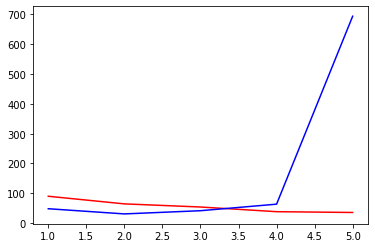

In [ ]:
#### plot the MSE for training and validation
plt.plot(dgrlist,msqListTrain,'red')
plt.plot(dgrlist,msqListVal,'blue')



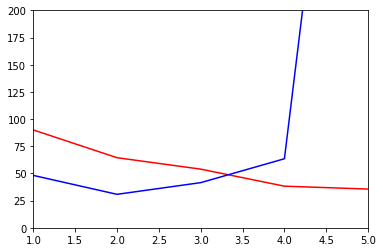

In [ ]:
##lets look closer to breaking point
axes = plt.gca()
axes.set_xlim([1,5])
axes.set_ylim([0,200])
plt.plot(dgrlist,msqListTrain,'red')
plt.plot(dgrlist,msqListVal,'blue')

obviously 2 degree polynomial is the best choice we've got. It has the lowest validation error without overfitting. However, after 2 degree, it overfits to training data and error of validation data increases a lot

#c-) Compute the covariance matrix of the dataset, and observing that, discard d
#columns from the predictor features. Notice here that d is another hyperparameter.
#Use the optimal value of p you found in part a, and draw on a figure the mean
#squared training and validation error curves as a function of d for d = 0, 1, 2, 3.
#What is the optimal value of d? Which features are discarded? Justify your reasoning

In [ ]:
x_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
287,2013.000,19.2,461.1016,5,24.95425,121.53990
31,2012.750,29.6,769.4034,7,24.98281,121.53408
209,2012.833,34.8,175.6294,8,24.97347,121.54271
239,2013.500,18.1,837.7233,0,24.96334,121.54767
47,2013.583,35.9,640.7391,3,24.97563,121.53715
...,...,...,...,...,...,...
343,2013.000,33.5,563.2854,8,24.98223,121.53597
359,2013.500,5.6,2408.9930,0,24.95505,121.55964
323,2013.417,28.6,197.1338,6,24.97631,121.54436
280,2013.250,2.3,184.3302,6,24.96581,121.54086


In [ ]:
ArrayDftrain= np.array(x_train)
cm = np.cov(ArrayDftrain.T)
cm

array([[ 8.01795958e-02,  1.58969464e-01,  3.45384290e+01,
        -7.98475346e-03,  1.34926162e-04, -2.18537855e-04],
       [ 1.58969464e-01,  1.34242719e+02,  4.86111311e+02,
         2.23289120e+00,  4.34315462e-03, -1.35427100e-02],
       [ 3.45384290e+01,  4.86111311e+02,  1.74233163e+06,
        -2.40559286e+03, -1.00983486e+01, -1.69703123e+01],
       [-7.98475346e-03,  2.23289120e+00, -2.40559286e+03,
         9.29863514e+00,  1.71368811e-02,  2.21329254e-02],
       [ 1.34926162e-04,  4.34315462e-03, -1.00983486e+01,
         1.71368811e-02,  1.67425583e-04,  8.54155878e-05],
       [-2.18537855e-04, -1.35427100e-02, -1.69703123e+01,
         2.21329254e-02,  8.54155878e-05,  2.44469842e-04]])

In [ ]:
mean_matrix = np.mean(ArrayDftrain, axis = 0)
mean_matrix.shape

(6,)

In [ ]:
mean_matrix

array([2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
         24.96864882,  121.53247969])

In [ ]:
mean_matrix_tiled = np.tile(mean_matrix, (ArrayDftrain.shape[0],1))
mean_matrix_tiled

array([[2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
          24.96864882,  121.53247969],
       [2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
          24.96864882,  121.53247969],
       [2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
          24.96864882,  121.53247969],
       ...,
       [2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
          24.96864882,  121.53247969],
       [2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
          24.96864882,  121.53247969],
       [2013.14330796,   18.22802768, 1144.10892284,    3.91695502,
          24.96864882,  121.53247969]])

In [ ]:
substracted = ArrayDftrain - mean_matrix_tiled
substracted

array([[-1.43307958e-01,  9.71972318e-01, -6.83007323e+02,
         1.08304498e+00, -1.43988235e-02,  7.42031142e-03],
       [-3.93307958e-01,  1.13719723e+01, -3.74705523e+02,
         3.08304498e+00,  1.41611765e-02,  1.60031142e-03],
       [-3.10307958e-01,  1.65719723e+01, -9.68479523e+02,
         4.08304498e+00,  4.82117647e-03,  1.02303114e-02],
       ...,
       [ 2.73692042e-01,  1.03719723e+01, -9.46975123e+02,
         2.08304498e+00,  7.66117647e-03,  1.18803114e-02],
       [ 1.06692042e-01, -1.59280277e+01, -9.59778723e+02,
         2.08304498e+00, -2.83882353e-03,  8.38031142e-03],
       [ 3.56692042e-01,  1.34719723e+01,  4.36792908e+03,
        -2.91695502e+00, -1.76988235e-02, -4.78996886e-02]])

In [ ]:
cov_matrix = np.matmul(substracted.T, substracted) / (ArrayDftrain.shape[0]-1)
covdf = pd.DataFrame(cov_matrix)
covdf.head(10)

,0,1,2,3,4,5
0,0.080180,0.158969,3.453843e+01,-0.007985,0.000135,-0.000219
1,0.158969,134.242719,4.861113e+02,2.232891,0.004343,-0.013543
2,34.538429,486.111311,1.742332e+06,-2405.592863,-10.098349,-16.970312
3,-0.007985,2.232891,-2.405593e+03,9.298635,0.017137,0.022133
4,0.000135,0.004343,-1.009835e+01,0.017137,0.000167,0.000085
5,-0.000219,-0.013543,-1.697031e+01,0.022133,0.000085,0.000244


In [ ]:
##find covariance of a column that closest to 0 which may most unrelated feature
def dropColmn(x_train, x_val,y_train,y_val,d,msqListTrain,msqListVal):
  TempTrain = x_train.copy(deep=True)
  TempVal = x_val.copy(deep=True)

  MeanOfCols = []
  WhichRow = [] 

  ArrayDftrain= np.array(TempTrain)
  cm = np.cov(ArrayDftrain.T)
  mean_matrix = np.mean(ArrayDftrain, axis = 0)
  mean_matrix_tiled = np.tile(mean_matrix, (ArrayDftrain.shape[0],1))
  substracted = ArrayDftrain - mean_matrix_tiled
  cov_matrix = np.matmul(substracted.T, substracted) / (ArrayDftrain.shape[0]-1)
  MeanOfCols = []
  WhichRow = []
  taban = 0
  for i in range(len(cov_matrix)):                #list of mean of covariances and list of indexes of that means
    MeanOfCols.append(np.mean(abs(cov_matrix[i]),axis= 0))
    WhichRow.append(i)                          
  print('Columns that dropped:')
  for times in range(d):  # d times drop the least related column
    index = np.argmin(MeanOfCols)
    print('--',df.columns[WhichRow[index]])
    TempTrain.drop(df.columns[WhichRow[index]],axis = 1, inplace= True)
    TempVal.drop(df.columns[WhichRow[index]],axis = 1, inplace= True)    
    MeanOfCols[index] = max(MeanOfCols)+1 

  poly_reg = PolynomialFeatures(degree = 2) ## polynomial fit
  X_poly = poly_reg.fit_transform(TempTrain)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y_train)
  y_pred = lin_reg.predict(X_poly)
  print(d, ' Columns dropped')
  print('mean squared error of training: %.2f' % mean_squared_error(y_train,y_pred))
  msqListTrain.append( mean_squared_error(y_train,y_pred))
  X_poly = poly_reg.fit_transform(TempVal)
  y_pred = lin_reg.predict(X_poly) 
  print('mean squared error of val: %.2f' % mean_squared_error(y_val,y_pred))
  msqListVal.append( mean_squared_error(y_val,y_pred))

Columns that dropped:
0  Columns dropped
mean squared error of training: 64.47
mean squared error of val: 30.79
Columns that dropped:
-- X5 latitude
1  Columns dropped
mean squared error of training: 73.17
mean squared error of val: 46.85
Columns that dropped:
-- X5 latitude
-- X6 longitude
2  Columns dropped
mean squared error of training: 76.35
mean squared error of val: 45.11
Columns that dropped:
-- X5 latitude
-- X6 longitude
-- X1 transaction date
3  Columns dropped
mean squared error of training: 81.17
mean squared error of val: 42.33


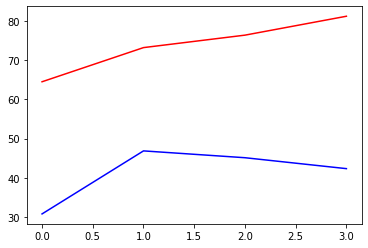

In [ ]:
liste = range(4)
dgrlist = [0,1,2,3]
msqListTrain= []
msqListVal= []
for i in liste:
  dropColmn(x_train, x_val,y_train,y_val,i,msqListTrain,msqListVal)
plt.plot(dgrlist,msqListTrain,'red')
plt.plot(dgrlist,msqListVal,'blue')

In [ ]:
%%shell
jupyter nbconvert --to html /content/hw2ml.ipynb

[NbConvertApp] Converting notebook /content/hw2ml.ipynb to html
[NbConvertApp] Writing 361019 bytes to /content/hw2ml.html


optimum value of d is 0 for this case. 

The order of dropped columns is like below:

1-) X5 latitude

2-) X6 longitude

3-) X1 transaction date

these columns are dropped due to their covariance values. Column that is closest to "covariance = 0" is dropped. If we want to drop multiple columns, it is in the order of closest to furhtest in terms of absolute value due to covariance = 0.

#Report

In this question, we need to find out the better hyperparameters in terms of degree of polynomial and number of columns we need to drop.

While we are going through this question we need to use polynomial features, covariance and plotting to find out and set these hyperparameters.

For preprocessing, firstly, i seperated the label which is y from the original data. After that, i find out that there is an extra column to indicate the indexes of rows. So, i dropped this column too. Finally, I checked for any missing values and shapes of splitted dataframes. However, there were not any missing values or any different problems in this dataset. So, i did not do anything about it.

Firstly, I splitted the original data into 2 parts as train and test data. 30% of original data is splitted as test, remaining data, which is 70%, is splitted as training data. Then, I also splitted the test data as 2 parts. 50% of this data remained test data. However, 50% of it become my validation data.
So, final distribution is 70% train , %15 test, %15 validation.

In the first part, we were trying to find out which degree of the polnomial feauture works best. We have obtained the best results with the  PolynomialFeatures (degree = 2), with the result of "mean squared error of training: 64.47" and "mean squared error of val: 30.79"

In The second part, we were trying to find out which columns can be dropped and number of columns that we need to drop to minimize our mean squarred error. We have obtained if we drop 0 column, we can achieve best result which is same with first part. "mean squared error of training: 64.47" and  "mean squared error of val: 30.79". When we drop some columns, mean squarred error of both datasets are increased.  

Since we did not compared any algorithms, we can not say anthing about speeds of algorithms. Also, since dataset is small, it may not be understandable difference.